In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import json 

#plot confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# import stratified k fold
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier


from xgboost import XGBClassifier
import re


import statistics


from sklearn.model_selection import GridSearchCV

# import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold



from sklearn.metrics import make_scorer


import time


warnings.filterwarnings('ignore')

# Helper Functions

In [2]:
#plot roc curve
from sklearn.metrics import roc_curve, auc
#plot roc curve
def plot_roc_curve(y_test, y_pred,label):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: '+label)
    plt.legend(loc="lower right")
    plt.show()


In [3]:
# plot confusion matrix function
def plot_confusion_matrix(y_test, y_pred, label):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title('Confusion Matrix: '+label)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
# function for metrics
def metrics(X,y,y_test, y_pred, modell = None, crossval = True, parameters = None):


    print("----- Metric for 80/20 Split -----")
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    print("Recall score:", recall_score(y_test, y_pred))
    print("Precision score:", precision_score(y_test, y_pred))
    print("fbeta score:", fbeta_score(y_test, y_pred, beta=2))
    print("----- Metric for Cross Validation -----")

    if crossval == True:
        modell.fit(X,y)
        
        print("Crossval score:", statistics.mean(cross_val_score(modell ,X, y, scoring=f2,cv = cv )))
        # print all the scores
        print("Crossval score:", cross_val_score(modell ,X, y, scoring=f2,cv = cv ))
    
       
        

In [5]:
# append metrics to dictionary
def metrics_dict_non_opt(y_test, y_pred, label, modell = None):
    Non_opt_results["Algo_name"].append(label)
    Non_opt_results["Recall"].append(recall_score(y_test, y_pred))
    Non_opt_results["Precision"].append(precision_score(y_test, y_pred))
    Non_opt_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    Non_opt_results["F2"].append(fbeta_score(y_test, y_pred,beta=2))
    Non_opt_results["F2-CV"].append(statistics.mean(cross_val_score(modell ,X, y, scoring=f2,cv = cv )))


def metrics_dict_opt(y_test, y_pred, label, modell = None):
    Opt_results["Algo_name"].append(label)
    Opt_results["Recall"].append(recall_score(y_test, y_pred))
    Opt_results["Precision"].append(precision_score(y_test, y_pred))
    Opt_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    Opt_results["F2"].append(fbeta_score(y_test, y_pred,beta=2))
    Opt_results["F2-CV"].append(statistics.mean(cross_val_score(modell ,X, y, scoring=f2,cv = cv )))

In [6]:
# define function for crossvalidation and grid search measurement
def f2_measure(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=2)
f2 = make_scorer(f2_measure)

In [7]:

# load german_data_cleaned.csv
german_data = pd.read_csv('german_data_cleaned.csv')

In [8]:
german_data

,Installmentrate %,PresentResidence,Age in years,Number existing Credits,Number people liable,Target,Credit Amount per Month,Status Checking_0 less than or equal and less than 200 DM,Status Checking_bigger than 200DM / salary assignments for at least 1 year,Status Checking_less than 0 DM,...,Housing_own,Housing_rent,Job_management/self-employed/highly qualified employee/officer,Job_skilled employee /official,Job_unemployed/unskilled-non-resident,Job_unskilled-resident,Telephone_None,"Telephone_yes, registered under the customers name",Foreign Worker_no,Foreign Worker_yes
0,4,4,67,2,1,0,194.833333,0,0,1,...,1,0,0,1,0,0,0,1,0,1
1,2,2,22,1,1,1,123.979167,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,2,3,49,1,2,0,174.666667,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,2,4,45,1,2,0,187.666667,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,3,4,53,2,2,1,202.916667,0,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,3,4,31,1,1,0,144.666667,0,0,0,...,1,0,0,0,0,1,1,0,0,1
971,4,4,40,1,1,0,128.566667,0,0,1,...,1,0,1,0,0,0,0,1,0,1
972,4,4,38,1,1,0,67.000000,0,0,0,...,1,0,0,1,0,0,1,0,0,1
973,4,4,23,1,1,1,41.000000,0,0,1,...,0,0,0,1,0,0,0,1,0,1


# Split Feauture und Target

In [9]:
# split features and target
X = german_data.drop(['Target'], axis=1)
y = german_data['Target']

In [10]:

# Kreuzvalidierung
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

In [11]:
# create dictionary with algo names and score metrics for later analysis

Non_opt_results = {"Algo_name": [], "Recall": [],"Precision": [],"Accuracy": [], "F2": [], "F2-CV": []}

In [12]:
# split data into train and test set 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling Non-Optimized

## Logistic Regression

In [13]:
# use logistic regression to predict target variable
# create logistic regression model with standard parameters

def logistic_regression(X_train, X_test, y_train, y_test, hyperopt = False, parameters=dict()):
    logreg = LogisticRegression(random_state=42, **parameters)
    
   
    if hyperopt == False:
        # fit the model
        logreg.fit(X_train, y_train)

        # predict the target variable
        y_pred = logreg.predict(X_test)
        
        # print accuracy score and recall score
        metrics(X,y,y_test, y_pred, crossval=True, modell=logreg)

        print(X_train.shape ,y_train.shape)

        # add algo name and recall score to dictionary
        metrics_dict_non_opt(y_test, y_pred, "Logistic Regression", logreg)
        plot_roc_curve(y_test, y_pred,"Logistic Regression")
        plot_confusion_matrix(y_test,y_pred,"Logistic Regression")
    else:

        return logreg

    return logreg


----- Metric for 80/20 Split -----
Accuracy score: 0.7743589743589744
Recall score: 0.5172413793103449
Precision score: 0.6521739130434783
fbeta score: 0.5395683453237411
----- Metric for Cross Validation -----
Crossval score: 0.45746489823219394
Crossval score: [0.41509434 0.43560606 0.39622642 0.48076923 0.51094891 0.45283019
 0.52158273 0.42910448 0.45454545 0.47794118]
(780, 60) (780,)


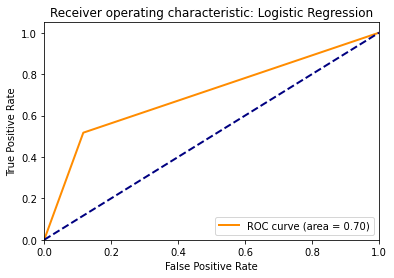

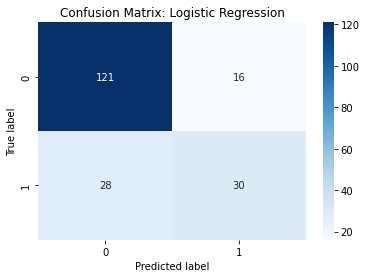

LogisticRegression(random_state=42)

In [14]:
logistic_regression(X_train, X_test, y_train, y_test)

## Random Forest

In [15]:
def random_forest(X_train, X_test, y_train, y_test, hyperopt = False, parameters=dict()):
    rf = RandomForestClassifier(random_state=42,**parameters)

    if hyperopt == False:
        rf.fit(X_train, y_train)
        # predict the target variable
        y_pred = rf.predict(X_test)
        # print accuracy score and recall score
        metrics(X,y,y_test, y_pred, crossval=True, modell=rf)


        metrics_dict_non_opt(y_test, y_pred, "Random forest", rf)


        # show feature importance for random forest

        importances = rf.feature_importances_
        # plot importances
        plt.figure(figsize=(10,10))
        # order importances
        indices = np.argsort(importances)[::-1]
        sns.barplot(x=importances[indices], y=X_train.columns, orient='h')
        plt.xlabel('Feature Importance')
        plt.ylabel('Features')
        plt.title('Feature Importance')
        plt.show()

        plot_roc_curve(y_test, y_pred,"Random Forest")
        plot_confusion_matrix(y_test,y_pred,"Random Forest")
    else:
        return rf
    return rf

----- Metric for 80/20 Split -----
Accuracy score: 0.7794871794871795
Recall score: 0.43103448275862066
Precision score: 0.7142857142857143
fbeta score: 0.4681647940074906
----- Metric for Cross Validation -----
Crossval score: 0.36851508700719454
Crossval score: [0.39525692 0.3815261  0.32818533 0.37848606 0.40856031 0.32
 0.51136364 0.29411765 0.31746032 0.35019455]


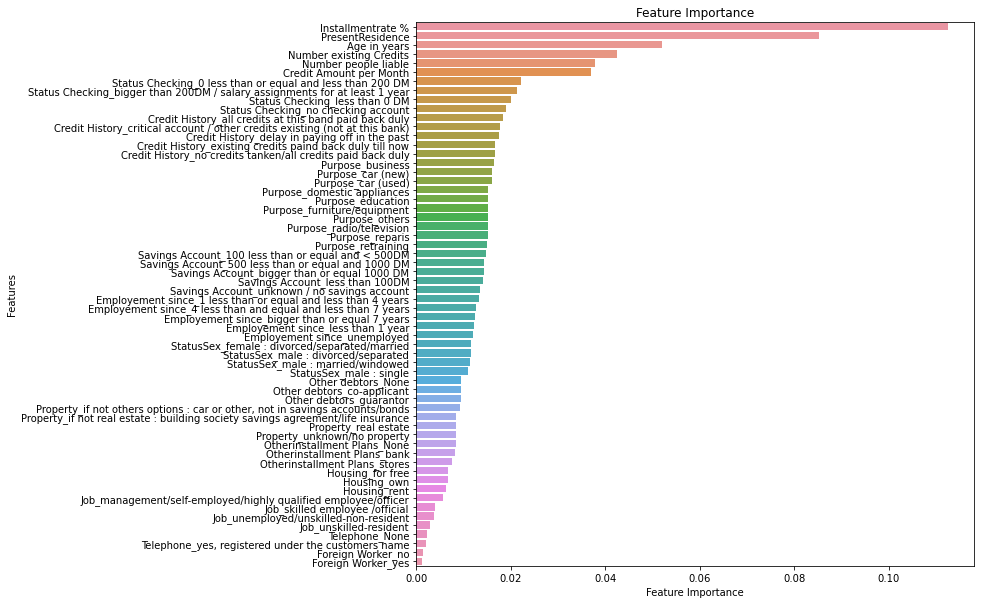

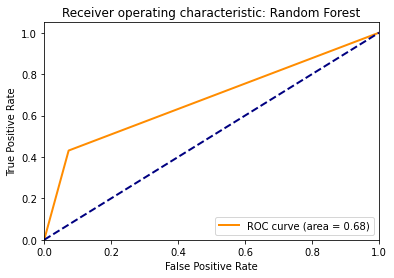

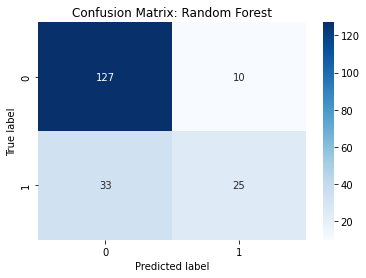

RandomForestClassifier(random_state=42)

In [16]:
random_forest(X_train, X_test, y_train, y_test)

## Neuronal Network

Normalerweise würde man die Daten für das Training mit einem Neuronalen Netz mithilfe eines scaler nomalisieren bzw. skalieren.
Dies wurde auch mithilfe des minmax scalers und dem standardscaler versucht. Allerdings hatten beide einen negativen Einfluss auf die Ergebnisse des Modells

In [17]:
# use neuro network to predict target variable
# als baseline werden die Standardparameter verwendet
# normalisieren
# fit the model

# import standard scaler from sklearn
from sklearn.preprocessing import StandardScaler


def neuronal_network(X_train, X_test, y_train, y_test, hyperopt = False, parameters=dict()):
    
    if hyperopt == False:
        nn = MLPClassifier(hidden_layer_sizes=(100), random_state=42, **parameters)
        nn.fit(X_train, y_train)
        # predict the target variable
        y_pred = nn.predict(X_test)
        # print accuracy score and recall score
        metrics(X,y,y_test, y_pred, crossval=True, modell=nn)


        metrics_dict_non_opt(y_test, y_pred, "Neural Network", nn)

        plot_roc_curve(y_test, y_pred,"Neural Network")
        plot_confusion_matrix(y_test,y_pred,"Neural Network")
    else:
        return nn
    return nn

----- Metric for 80/20 Split -----
Accuracy score: 0.764102564102564
Recall score: 0.6551724137931034
Precision score: 0.59375
fbeta score: 0.6418918918918919
----- Metric for Cross Validation -----
Crossval score: 0.4489034131047634
Crossval score: [0.4494382  0.41666667 0.34351145 0.45283019 0.49242424 0.40697674
 0.56537102 0.45112782 0.38910506 0.52158273]


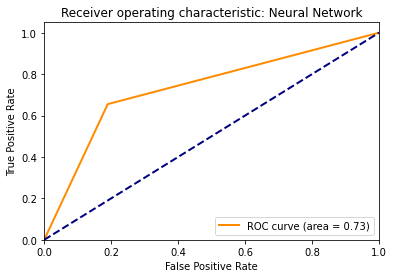

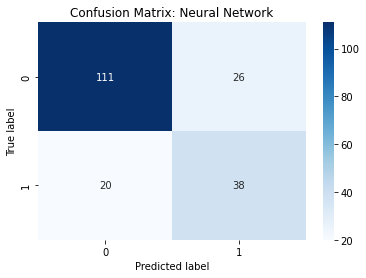

MLPClassifier(hidden_layer_sizes=100, random_state=42)

In [18]:
neuronal_network(X_train, X_test, y_train, y_test)

## xGboost

In [ ]:
# use xgboost to predict target variable
def xgboost(X_train, X_test, y_train, y_test, hyperopt = False, parameters=dict()):
    regex = re.compile(r"\[|\]|<", re.IGNORECASE)

    X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
    X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

    # fit the model
    xgb = XGBClassifier(random_state=42,**parameters)

    if hyperopt == False:
        xgb.fit(X_train, y_train)
        # predict the target variable
        y_pred = xgb.predict(X_test)
        # print accuracy score and recall score
        metrics(X,y,y_test, y_pred, crossval=True, modell=xgb)


        metrics_dict_non_opt(y_test, y_pred, "xGboost", xgb)

        plot_roc_curve(y_test, y_pred,"xGboost")
        plot_confusion_matrix(y_test,y_pred,"xGboost")
    else:
        return xgb
    return xgb


In [ ]:
xgboost(X_train, X_test, y_train, y_test)

# Modelling Optimized with Hyperparametertuning

In [ ]:
# dictionary for hypertuned modells
Opt_results = {"Algo_name": [], "Recall": [],"Precision": [],"Accuracy": [], "F2": [], "F2-CV": []}

## Logistic Regression Hyperparamter Tuning

In [ ]:
#hyperparameter tuning for logistic regression
#tune hyperparameters
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'],'intercept_scaling': [100, 500, 1000, 5000, 10000], 'class_weight': ["balanced", None]}
# create grid search object with cross validation
grid_search = GridSearchCV(logistic_regression(X_train, X_test, y_train, y_test, hyperopt=True), parameters, cv=cv, scoring=f2, n_jobs=-1)
# fit the model
grid_search.fit(X_train, y_train)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# save best hyperparameters in variable
logreg_best_parameters = grid_search.best_params_

Best hyperparameters: {'C': 0.01, 'class_weight': 'balanced', 'intercept_scaling': 100, 'penalty': 'l2'}
Best score: 0.6394525956304628


In [ ]:
logistic_regression(X_train, X_test, y_train, y_test, hyperopt=False, parameters=logreg_best_parameters)

Versuch mit Optuna, Ergebnisse sind allerdings Ähnlich

In [ ]:

# einmal mit optuna ausprobiert
# import optuna
import optuna 
# tune hyperparameters with optuna package
def tune_logistic_regression(X_train, X_test, y_train, y_test):
    # create optuna object
    study = optuna.create_study(direction="maximize")
    # define objective function
    def objective(trial):
        # define hyperparameters
        C = trial.suggest_uniform("C", 0.001, 1000)
        penalty = trial.suggest_categorical("penalty", [ "l2"])
        intercept_scaling = trial.suggest_int("intercept_scaling", 1, 100000)
        class_weight = trial.suggest_categorical("class_weight", ["balanced", None])
        # create logistic regression object
        logreg = LogisticRegression(C=C, penalty=penalty, intercept_scaling=intercept_scaling, class_weight=class_weight, random_state=42)
        # fit the model
        logreg.fit(X_train, y_train)
        # predict the target variable
        y_pred = logreg.predict(X_test)
        # return recall score
        return recall_score(y_test, y_pred)
    # run optimization with objective function
    study.optimize(objective, n_trials=100)
    # print the best hyperparameters
    print("Best hyperparameters:", study.best_params)
    print("Best score:", study.best_value)
    # save best hyperparameters in variable
    logreg_best_parameters = study.best_params
    # create logistic regression object with best hyperparameters
    logreg = LogisticRegression(C=logreg_best_parameters["C"], penalty=logreg_best_parameters["penalty"], intercept_scaling=logreg_best_parameters["intercept_scaling"], class_weight=logreg_best_parameters["class_weight"], random_state=42)
    # fit the model
    logreg.fit(X_train, y_train)
    # predict the target variable
    y_pred = logreg.predict(X_test)
    # print accuracy score and recall score
    metrics(X,y,y_test, y_pred, crossval=True, modell=logreg)

tune_logistic_regression(X_train, X_test, y_train, y_test)

## Random Forest Optimized

In [ ]:
#hyperparameter tuning for random forest
#tune hyperparameters
parameters = {'n_estimators': [10, 100, 500], 'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'max_features': [None, "auto", "sqrt", "log2"], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}
# create grid search object with cross validation
# count time for optimization
start = time.time()
grid_search = GridSearchCV(random_forest(X_train, X_test, y_train, y_test, hyperopt=True), parameters, cv=cv, scoring=f2 ,n_jobs= -1)
# time for optimization
end = time.time()
print("Time for optimization:", end - start)
# fit the model
grid_search.fit(X_train, y_train)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
rf_best_parameters = grid_search.best_params_


In [ ]:
# pass best hyperparameters to random forest function
random_forest(X_train, X_test, y_train, y_test, hyperopt=False, parameters=rf_best_parameters)



## xGboost Optimized

In [ ]:
# hyperparameter tuning for xgboost
#tune hyperparameters
parameters = {'n_estimators': [10, 100, 500], 'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'max_features': [None, "auto", "sqrt", "log2"], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}
# create grid search object with cross validation
grid_search = GridSearchCV(xgboost(X_train, X_test, y_train, y_test, hyperopt=True), parameters, cv=cv, scoring=f2 ,n_jobs= -1)
# fit the model
grid_search.fit(X_train, y_train)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
xgb_best_parameters = grid_search.best_params_



In [ ]:
# pass best hyperparameters to xgboost function
xgboost(X_train, X_test, y_train, y_test, hyperopt=False, parameters=xgb_best_parameters)

## Neuronal Network Optimized

In [ ]:
# hyperparameter MLPClassifier with grid search
#tune hyperparameters
parameters = {'hidden_layer_sizes': [(15,)],'activation': ['logistic'],'solver': ['lbfgs', 'sgd', 'adam'], 'max_iter': [100], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'learning_rate_init': [0.0001, 0.001, 0.01, 0.1], 'power_t': [0.5, 0.75, 0.9], 'shuffle': [True, False]}
 # create grid search object with cross validation
grid_search = GridSearchCV(MLPClassifier(random_state=42), parameters, cv=cv, scoring=f2 ,n_jobs= -1)
# fit the model
grid_search.fit(X_train, y_train)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
mlp_best_parameters = grid_search.best_params_
# pass best hyperparameters to MLPClassifier function



In [71]:
from imblearn.pipeline import make_pipeline, Pipeline
parameters_log = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'logisticregression__penalty': ['l1', 'l2'],'logisticregression__intercept_scaling': [1, 10, 100, 1000], 'logisticregression__class_weight': ["balanced", None]}


smote = SMOTE(random_state=42,sampling_strategy="auto")

# logistic regresision classifier
clf_rf = LogisticRegression( random_state=42)

pipeline = make_pipeline(smote, clf_rf)


Gridsearch = GridSearchCV(pipeline,param_grid=parameters_log,
                                   cv = None, n_jobs=-1, scoring=f2)
# pipline.fit(X_train, y_train) with gridsearch

Gridsearch.fit(X_train_smote, y_train_smote)
print(fbeta_score(y_test, grid_search.predict(X_test), beta=2))

print("Best parameters:", Gridsearch.best_params_)
print("Best score:", Gridsearch.best_score_)
# save best hyperparameters in variable
log_best_parameters = Gridsearch.best_params_




0.5430711610486891
Best parameters: {'logisticregression__C': 1, 'logisticregression__class_weight': 'balanced', 'logisticregression__intercept_scaling': 1, 'logisticregression__penalty': 'l2'}
Best score: 0.7258520139669182


# Over/Undersampling SMOTE

In [20]:
# import smote from imbalanced-learn
from imblearn.over_sampling import SMOTE


In [21]:
# create smote object
smote = SMOTE(random_state=42,sampling_strategy="auto", k_neighbors=10)
# create smote train
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [22]:
print("Shape before SMOTE:", X_train.shape, y_train.shape)
print("Shape after SMOTE:", X_train_smote.shape, y_train_smote.shape)


Shape before SMOTE: (780, 60) (780,)
Shape after SMOTE: (1110, 60) (1110,)


In [60]:
# grid search for logistic regression
#tune hyperparameters
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ["l2"], 'intercept_scaling': [1, 10, 100, 1000], 'class_weight': ["balanced", None]}
# create grid search object with cross validation
grid_search = GridSearchCV(logistic_regression(X_train_smote, X_test, y_train_smote, y_test, hyperopt=True), parameters, cv=10, scoring=f2 ,n_jobs= -1)
# fit the model
grid_search.fit(X_train_smote, y_train_smote)

print(grid_search.cv_results_['mean_test_score'])




# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
logreg_best_parameters_smote = grid_search.best_params_

# logistic regression classifier with best hyperparameters
# create logistic regression classifier with best hyperparameters

print(recall_score(y_test, grid_search.predict(X_test)))

[0.70615565 0.70615565 0.70615565 0.70615565 0.70615565 0.70615565
 0.70615565 0.70615565 0.73534738 0.73534738 0.73534738 0.73534738
 0.73609208 0.73609208 0.73609208 0.73609208 0.75650799 0.75650799
 0.75650799 0.75650799 0.75252951 0.75252951 0.75252951 0.75252951
 0.76088632 0.76088632 0.76088632 0.76088632 0.74921928 0.74921928
 0.74921928 0.74921928 0.75097725 0.75097725 0.75097725 0.75097725
 0.74988576 0.74988576 0.74988576 0.74988576 0.75504907 0.75504907
 0.75504907 0.75504907 0.74056586 0.74056586 0.74056586 0.74056586
 0.73422226 0.73422226 0.73422226 0.73422226 0.7577223  0.7577223
 0.7577223  0.7577223 ]
Best hyperparameters: {'C': 1, 'class_weight': 'balanced', 'intercept_scaling': 1, 'penalty': 'l2'}
Best score: 0.760886315085591
0.5087719298245614


In [42]:
clf_logreg_smote = LogisticRegression(random_state=42, **logreg_best_parameters_smote)
# fit the model
clf_logreg_smote.fit(X_train_smote, y_train_smote)
# predict on test set
y_pred_logreg_smote = clf_logreg_smote.predict(X_test)
# print the f2 score
cross_val_score(clf_logreg_smote, X_train_smote, y_train_smote, cv=cv, scoring=f2)

array([0.75229358, 0.77272727, 0.84532374, 0.74074074, 0.84086799,
       0.83029197, 0.78610603, 0.78181818, 0.8076225 , 0.72097378])

0    555
1    555
Name: Target, dtype: int64

----- Metric for 80/20 Split -----
Accuracy score: 0.7487179487179487
Recall score: 0.5517241379310345
Precision score: 0.5818181818181818
fbeta score: 0.5574912891986062
----- Metric for Cross Validation -----
Crossval score: 0.6248532256920957
Crossval score: [0.63517915 0.625      0.62706271 0.60606061 0.66343042 0.67307692
 0.64935065 0.61258278 0.58631922 0.5704698 ]
(1110, 60) (1110,)


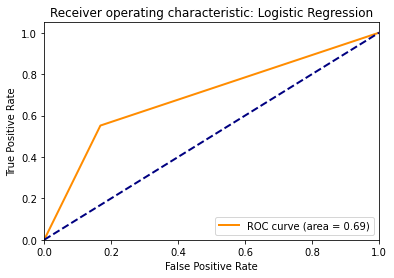

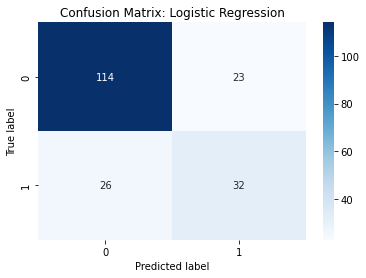

LogisticRegression(C=1, class_weight='balanced', random_state=42)

In [24]:
logistic_regression(X_train_smote, X_test, y_train_smote, y_test, hyperopt=False, parameters=logreg_best_parameters_smote)

In [65]:
f2_scores = []
for train_index, test_index in cv.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  
    #sm = SMOTE( n_jobs=-1)
    #X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model =  logistic_regression(X_train, X_test, y_train, y_test,hyperopt=True, parameters=logreg_best_parameters_smote)  # Choose a model here
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    print(f'f-score: {fbeta_score(y_test, y_pred, beta = 2)}')
    f2_scores.append(fbeta_score(y_test, y_pred, beta = 2))
    
print(f'Mean f-score: {statistics.mean(f2_scores)}')

f-score: 0.6351791530944625
f-score: 0.6250000000000001
f-score: 0.6270627062706271
f-score: 0.6060606060606062
f-score: 0.6634304207119741
f-score: 0.6730769230769231
f-score: 0.6493506493506493
f-score: 0.6125827814569537
f-score: 0.5863192182410422
f-score: 0.5704697986577181
Mean f-score: 0.6248532256920957


In [ ]:
# grid search for random forest
#tune hyperparameters
parameters = {'n_estimators': [10, 100, 500], 'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'max_features': [None, "auto", "sqrt", "log2"], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}
# create grid search object with cross validation
grid_search = GridSearchCV(random_forest(X_train_smote, X_test, y_train_smote, y_test, hyperopt=True), parameters, cv=cv, scoring=f2 ,n_jobs= -1)
# fit the model
grid_search.fit(X_train_smote, y_train_smote)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
rf_best_parameters_smote = grid_search.best_params_


KeyboardInterrupt: 

In [ ]:
random_forest(X_train_smote, X_test, y_train_smote, y_test, hyperopt=False, parameters=rf_best_parameters_smote)

In [ ]:
f2_scores = []
for train_index, test_index in cv.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  
    sm = SMOTE(sampling_strategy="minority",random_state=42, k_neighbors=5 , n_jobs=-1)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model =  random_forest(X_train_oversampled, X_test, y_train_oversampled, y_test,hyperopt=True, **parameters)  # Choose a model here
    model.fit(X_train_oversampled, y_train_oversampled)  
    y_pred = model.predict(X_test)
    print(f'f-score: {fbeta_score(y_test, y_pred, beta = 2)}')
    f2_scores.append(fbeta_score(y_test, y_pred, beta = 2))
    
print(f'Mean f-score: {statistics.mean(f2_scores)}')

# xGboost

In [ ]:
# grid search for logistic regression
#tune hyperparameters
parameters = {'n_estimators': [10, 100, 500], 'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'max_features': [None, "auto", "sqrt", "log2"], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}

# create grid search object with cross validation
grid_search = GridSearchCV(xgboost(X_train_smote, X_test, y_train_smote, y_test, hyperopt=True), parameters, cv=cv, scoring=f2 ,n_jobs= -1)
# fit the model
grid_search.fit(X_train_smote, y_train_smote)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
xgb_best_parameters_smote = grid_search.best_params_

In [ ]:
f2_scores = []
for train_index, test_index in cv.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  
    sm = SMOTE(sampling_strategy="minority",random_state=42, k_neighbors=5 , n_jobs=-1)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model =  xgboost(X_train_oversampled, X_test, y_train_oversampled, y_test,hyperopt=True, **parameters)  # Choose a model here
    model.fit(X_train_oversampled, y_train_oversampled)  
    y_pred = model.predict(X_test)
    print(f'f-score: {fbeta_score(y_test, y_pred, beta = 2)}')
    f2_scores.append(fbeta_score(y_test, y_pred, beta = 2))
    
print(f'Mean f-score: {statistics.mean(f2_scores)}')

# Neuronale Netze SMOTE

# Exkurs Explainable AI

In [ ]:
import wittgenstein as lw
from wittgenstein.ripper import RIPPER
from wittgenstein.interpret import interpret_model, score_fidelity
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict


In [ ]:
# load data to pandas dataframe
ripper_data = pd.read_csv("german_data_ripper.csv")

In [ ]:



# split features and target
X = ripper_data.drop(['Target'], axis=1)
y = ripper_data['Target']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# funktion for fitting Ripper model
def ripper(X_train, X_test, y_train, y_test):
    # create ripper object
    ripper = lw.RIPPER(random_state=42,k=3, dl_allowance=64, n_discretize_bins=10, verbosity=0)
    # fit the model
    ripper.fit(X_train, y_train)
    # predict the target variable
    y_pred = ripper.predict(X_test)
    # print accuracy score and recall score
    metrics(X,y,y_test, y_pred, crossval=True, modell=ripper)

    metrics_dict_non_opt(y_test, y_pred, "Ripper", ripper)

   
    ripper.out_model()

    plot_roc_curve(y_test, y_pred,"Ripper")
    plot_confusion_matrix(y_test,y_pred,"Ripper")
    

In [ ]:
ripper(X_train, X_test, y_train, y_test)